Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

ModuleNotFoundError: No module named 'tensorflow'

Dataset Simulation or Import

> Simulating dataset structure for demonstration:
> In practice, replace this with EyePACS or Messidor and mount Google Drive
> e.g., from google.colab import drive; drive.mount('/content/drive')
> and set dataset_dir = "/content/drive/MyDrive/dataset"



In [ ]:
!mkdir -p dataset/train/normal dataset/train/dr
!mkdir -p dataset/val/normal dataset/val/dr

Data Preprocessing

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


Model Building

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,345 (42.61 MB)

 Trainable params: 11,169,217 (42.61 MB)

 Non-trainable params: 128 (512.00 B)

Model Training

In [ ]:
epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.5946 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - accuracy: 0.0000e+00 - loss: 10.1614 - val_accuracy: 0.5000 - val_loss: 0.6980
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 4.9510 - val_accuracy: 0.5000 - val_loss: 0.8797
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 5.7980 - val_accuracy: 0.5000 - val_loss: 0.8036
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step - accuracy: 1.0000 - loss: 0.0216 - val_accuracy: 0.5000 - val_loss: 0.7447
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step - accuracy: 0.5000 - loss: 1.9196 - val_accuracy: 0.5000 - val_loss: 0.7078
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.5000 - loss: 2.3583 - val_accuracy: 0.5000 - val_loss: 0.7058
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - accuracy: 0.5000 - loss: 8.8509 - val_accuracy: 0.5000 - val_loss: 0.6

Evaluation
-Evaluate model

In [ ]:
val_generator.reset()
predictions = model.predict(val_generator)
predicted_classes = (predictions > 0.5).astype(int)
true_classes = val_generator.classes

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Confusion Matrix:
[[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation
-ROC and AUC

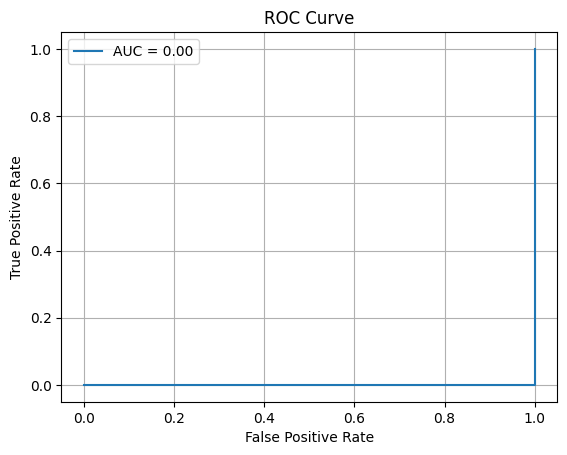

In [ ]:
auc_score = roc_auc_score(true_classes, predictions)
fpr, tpr, thresholds = roc_curve(true_classes, predictions)

plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Visualization of Predictions
-Display a few predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


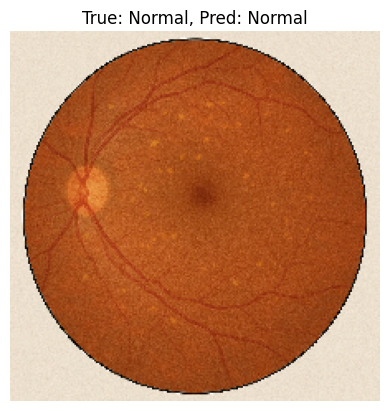

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


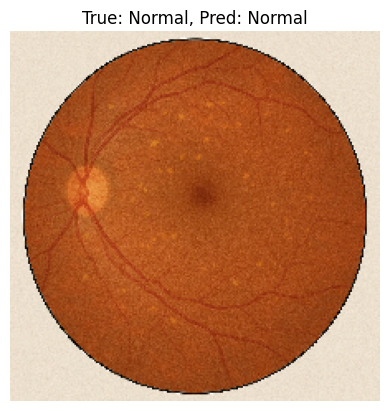

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


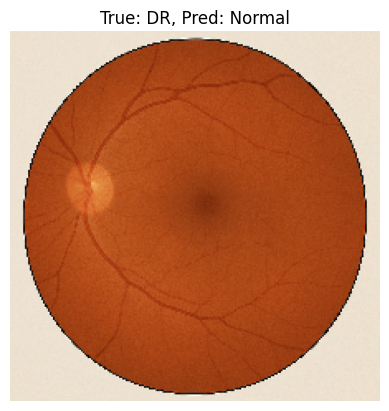

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


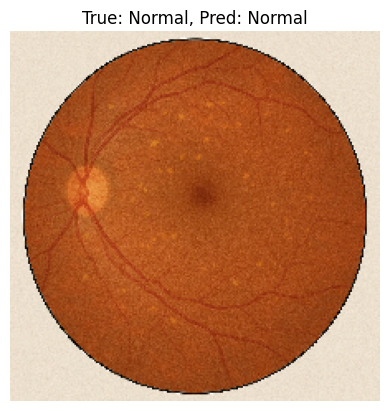

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


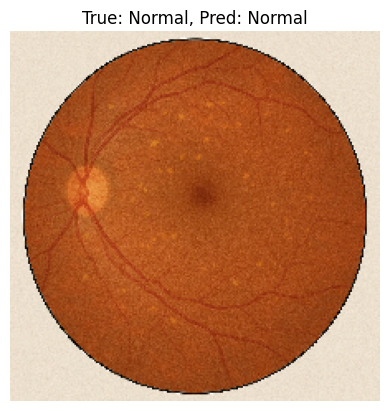

In [ ]:
for i in range(5):
    img, label = next(val_generator)
    pred = model.predict(img)
    plt.imshow(img[0])
    plt.title(f"True: {'DR' if label[0] else 'Normal'}, Pred: {'DR' if pred[0][0]>0.5 else 'Normal'}")
    plt.axis('off')
    plt.show()